In [11]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pydotplus
import graphviz
from sklearn.preprocessing import LabelEncoder

In [12]:
#尋找資料，定義資料型態
data = pd.read_csv('adult.data',header = None)
data.columns = {'age':int,
               'workclass':'category',
               'fnlwgt':int,
               'education':'category',
                'education_num':int,
               'marital-status':'category',
               'occupation':'category',
               'relationship':'category',
               'race':'category',
               'sex':'category',
               'capital-gain':int,
               'capital-loss':int,
               'hours-per-week':int,
               'native-country':'category',
               'listing_of_attributes':'category'}
data.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,listing_of_attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#LabelEncoder更改資料型態
le=LabelEncoder()
for col in data[['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]:
    data[col]=le.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    32561 non-null  int64 
 1   workclass              32561 non-null  int32 
 2   fnlwgt                 32561 non-null  int64 
 3   education              32561 non-null  int32 
 4   education_num          32561 non-null  int64 
 5   marital-status         32561 non-null  int32 
 6   occupation             32561 non-null  int32 
 7   relationship           32561 non-null  int32 
 8   race                   32561 non-null  int32 
 9   sex                    32561 non-null  int32 
 10  capital-gain           32561 non-null  int64 
 11  capital-loss           32561 non-null  int64 
 12  hours-per-week         32561 non-null  int64 
 13  native-country         32561 non-null  int32 
 14  listing_of_attributes  32561 non-null  object
dtypes: int32(8), int64(

In [14]:
#查詢缺失值，並丟棄不需要的屬性欄位
data.replace(" ?", np.nan, inplace= True)
new_data = data.dropna()
print(r'總比數紀錄:{}'.format(data.shape[0]))
print(r'刪除含缺漏紀錄資料後比數:{}'.format(data.dropna().shape[0]))
pd.get_dummies(new_data['workclass'])
workclass_encoding = pd.get_dummies(new_data['workclass'], prefix= 'workclass')

pd.get_dummies(new_data['education'])
educations_encoding = pd.get_dummies(new_data['education'], prefix= 'education')
new_data = new_data.drop('education', 1)

pd.get_dummies(new_data['marital-status'])
marital_status_encoding = pd.get_dummies(new_data['marital-status'], prefix= 'marital-status')
#new_data = new_data.drop('marital-status', 1)

pd.get_dummies(new_data['occupation'])
occupation_encoding = pd.get_dummies(new_data['occupation'], prefix= 'occupation')

pd.get_dummies(new_data['relationship'])
relationship_encoding = pd.get_dummies(new_data['relationship'], prefix= 'relationship')
new_data = new_data.drop('relationship', 1)

pd.get_dummies(new_data['race'])
race_encoding = pd.get_dummies(new_data['race'], prefix= 'race')

pd.get_dummies(new_data['sex'])
sex_encoding = pd.get_dummies(new_data['sex'], prefix= 'sex')

pd.get_dummies(new_data['native-country'])
native_country_encoding = pd.get_dummies(new_data['native-country'], prefix= 'native-country')

class_mapping = {' >50K': 1, ' <=50K': 0}
new_data['listing_of_attributes'] = new_data['listing_of_attributes'].map(class_mapping)

pd.DataFrame(new_data)

總比數紀錄:32561
刪除含缺漏紀錄資料後比數:32561


C:\Users\chenxuan\.conda\envs\First\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chenxuan\.conda\envs\First\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,age,workclass,fnlwgt,education_num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,listing_of_attributes
0,39,7,77516,13,4,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,4,0,0,0,38,39,0
32557,40,4,154374,9,2,7,4,1,0,0,40,39,1
32558,58,4,151910,9,6,1,4,0,0,0,40,39,0
32559,22,4,201490,9,4,1,4,1,0,0,20,39,0


In [15]:
#正規化
data2 = preprocessing.normalize(new_data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(new_data)
data3 = scaler.transform(new_data)

In [16]:
#建立特徵屬性x, 目標屬性y
x= new_data.drop(['listing_of_attributes'], axis = 1)
x_norm = preprocessing.normalize(x, norm= 'l2')
y = new_data['listing_of_attributes']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20)
x_train.shape

(26048, 12)

In [18]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
#預測 y_test
y_test_predicted = dtree.predict(x_test)
#結果
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print(accuracy)

0.815599570090588


score_array [0.7599047911547911, 0.8035933660933661, 0.8285472972972973, 0.8429054054054054, 0.8431357493857494, 0.8522727272727273, 0.8561501842751843, 0.8591062653562653, 0.8614097051597052, 0.8642122235872236, 0.8674754299754299, 0.8752687346437347, 0.8806818181818182, 0.8868243243243243, 0.8926213144963145, 0.9002994471744472, 0.9070178132678133, 0.9131219287469288, 0.921414312039312]
 
score_array_MAX: 0.921414312039312
----------------------------------------------------------------------------------------------------------
score_array_test [0.756333486872409, 0.803930600337786, 0.8372485797635498, 0.8486104713649624, 0.8487640104406572, 0.8558268079226163, 0.8587440503608168, 0.8596652848149854, 0.8578228159066482, 0.8570551205281745, 0.8565945033010901, 0.8572086596038692, 0.8541378780899739, 0.8499923230462153, 0.8461538461538461, 0.8472286196837095, 0.8453861507753724, 0.8424689083371718, 0.8367879625364655]
 
score_array_test_MAX: 0.8596652848149854


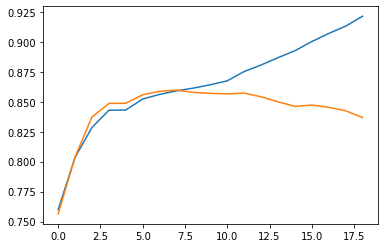

In [20]:
score_array= []
score_array_test= []

for i in range(1,20):
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth= i)
    dtree.fit(x_train, y_train)
    score_val = dtree.score(x_train, y_train)
    score_test = dtree.score(x_test, y_test)
    score_array.append(score_val)
    score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
plt.plot(score_array)
plt.plot(score_array_test)

In [21]:
# 建立樹的圖表
dot_tree = tree.export_graphviz(dtree,out_file=None)
graphviz = pydotplus.graph_from_dot_data(dot_tree)
# 輸出預測結果的圖檔
graphviz.write_pdf("adult_tree.pdf")

True